<a href="https://colab.research.google.com/github/YugeshwarV/TripFare/blob/main/TripFareNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TripFare : Predicting Urban Taxi Fare with Machine Learning

### Step 1 : Data Collection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import pickle
import joblib

In [ ]:
# Load the dataset
df = pd.read_csv("taxi_fare.csv")

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,01-03-2016 00:00,01-03-2016 00:07,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,01-03-2016 00:00,01-03-2016 00:11,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,01-03-2016 00:00,01-03-2016 00:31,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,01-03-2016 00:00,01-03-2016 00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,01-03-2016 00:00,01-03-2016 00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
df.shape

(212345, 18)

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'RatecodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [ ]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [ ]:
# Total missing values per column
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

### Step 3: Feature Engineering

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], dayfirst=True, errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], dayfirst=True, errors='coerce')

In [ ]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year

# Weekend flag
df['is_weekend'] = df['pickup_day'].isin([5, 6]).astype(int)

# AM or PM
df['am_or_pm'] = df['pickup_hour'].apply(lambda x: 'AM' if x < 12 else 'PM')

# Night time flag (e.g., 10 PM - 5 AM)
df['is_night'] = df['pickup_hour'].apply(lambda x: 1 if (x >= 22 or x <= 5) else 0)

In [ ]:
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

df['trip_distance_km'] = haversine_distance(df['pickup_latitude'], df['pickup_longitude'],
                                            df['dropoff_latitude'], df['dropoff_longitude'])


In [ ]:
# Fare per kilometer
df['fare_per_km'] = (df['fare_amount'] / (df['trip_distance_km'] + 1e-3)).round(2)

# Fare per minute
df['fare_per_min'] = (df['fare_amount'] / (df['trip_duration_min'] + 1e-3)).round(2)


In [ ]:
df['fare_per_min'].describe()


count    199240.000000
mean          0.958711
std           0.290511
min           0.100000
25%           0.750000
50%           0.882353
75%           1.083333
max           7.428571
Name: fare_per_min, dtype: float64

In [ ]:
# Remove trips with non-positive duration or distance
df = df[(df['trip_duration_min'] > 0) & (df['trip_distance_km'] > 0)]

In [ ]:
df.loc[:, 'fare_per_km'] = df['fare_amount'] / (df['trip_distance_km'] + 1e-3)
df.loc[:, 'fare_per_min'] = df['fare_amount'] / (df['trip_duration_min'] + 1e-3)

In [ ]:
df = df[(df['trip_duration_min'] > 0) & (df['trip_distance_km'] > 0)].copy()


In [ ]:
df['fare_per_km'] = (df['fare_amount'] / (df['trip_distance_km'] + 1e-3)).round(2)
df['fare_per_min'] = (df['fare_amount'] / (df['trip_duration_min'] + 1e-3)).round(2)

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,pickup_day,pickup_month,pickup_year,is_weekend,am_or_pm,is_night,trip_duration_min,trip_distance_km,fare_per_km,fare_per_min
0,1,2016-03-01 00:00:00,2016-03-01 00:07:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,1,3,2016,0,AM,1,7.0,3.138096,2.867981,1.285714
1,1,2016-03-01 00:00:00,2016-03-01 00:11:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,1,3,2016,0,AM,1,11.0,4.303331,2.556159,1.000000
2,2,2016-03-01 00:00:00,2016-03-01 00:31:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,1,3,2016,0,AM,1,31.0,16.600142,3.283104,1.758065
7,1,2016-03-01 00:00:00,2016-03-01 00:16:00,1,-73.788773,40.647758,1,N,-73.829208,40.712345,...,1,3,2016,0,AM,1,16.0,7.950066,2.578595,1.281250
8,1,2016-03-01 00:00:00,2016-03-01 00:05:00,1,-73.958221,40.764641,1,N,-73.967896,40.762901,...,1,3,2016,0,AM,1,5.0,0.837394,6.567992,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:00,2016-03-01 12:38:00,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,1,3,2016,0,PM,0,23.0,3.806279,4.203581,0.695652
212341,2,2016-03-01 12:15:00,2016-03-01 12:38:00,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,1,3,2016,0,PM,0,23.0,3.496576,4.432908,0.673913
212342,2,2016-03-01 12:15:00,2016-03-01 12:18:00,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,1,3,2016,0,PM,0,3.0,0.580120,6.895124,1.333333
212343,1,2016-03-01 12:15:00,2016-03-01 12:22:00,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,1,3,2016,0,PM,0,7.0,1.555737,4.499477,1.000000


In [ ]:
df = df[
    (df['fare_amount'] > 0) &
    (df['trip_distance_km'] > 0) &
    (df['trip_duration_min'] > 0)
].copy()

df['fare_per_km'] = (df['fare_amount'] / df['trip_distance_km'])
df['fare_per_min'] = (df['fare_amount'] / df['trip_duration_min'])

df = df[
    (df['fare_per_km'] >= 0.1) & (df['fare_per_km'] <= 10) &
    (df['fare_per_min'] >= 0.1) & (df['fare_per_min'] <= 10)
]


In [ ]:
amount_cols = ['fare_amount', 'tip_amount', 'tolls_amount', 'extra', 'total_amount']

for col in amount_cols:
    df = df[df[col] >= 0]

In [ ]:
print("Negative distances:", (df['trip_distance_km'] < 0).sum())
print("Negative durations:", (df['trip_duration_min'] < 0).sum())


Negative distances: 0
Negative durations: 0


In [ ]:
df = df[(df['trip_distance_km'] > 0) & (df['trip_duration_min'] > 0)].copy()


In [ ]:
df[df['fare_per_min'] < 0][['fare_amount', 'trip_duration_min', 'fare_per_min']]

,fare_amount,trip_duration_min,fare_per_min


In [ ]:
df = df[(df['fare_amount'] >= 0.3) & (df['trip_duration_min'] > 1)].copy()

In [ ]:
df['fare_per_min'] = df['fare_amount'] / df['trip_duration_min']

In [ ]:
print((df['fare_per_min'] < 0).sum())  # Should be 0

0


In [ ]:
df['fare_amount'].describe()

count    199240.000000
mean         12.784909
std          10.456639
min           2.500000
25%           6.500000
50%           9.500000
75%          14.500000
max         819.500000
Name: fare_amount, dtype: float64

### Step 4: Exploratory Data Analysis (EDA)

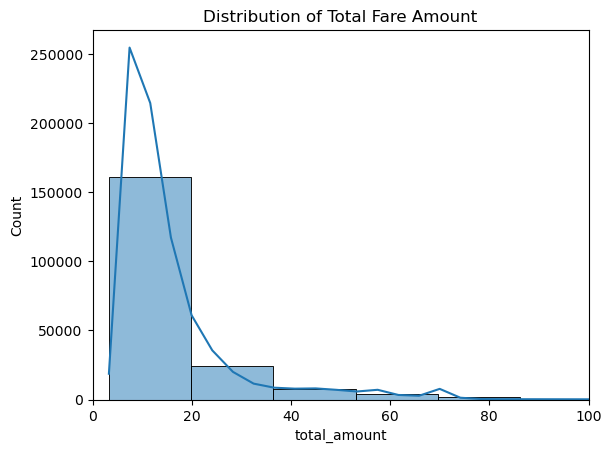

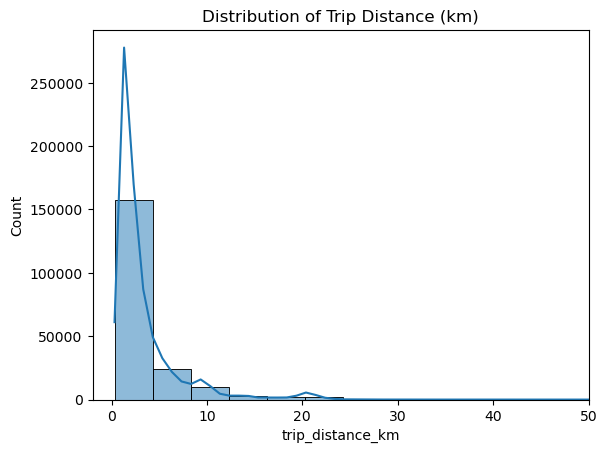

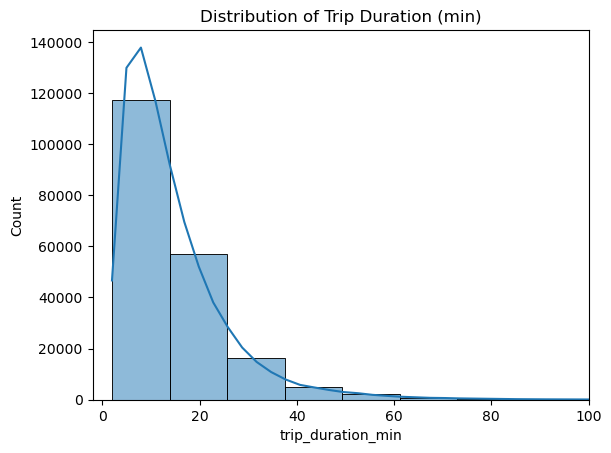

In [ ]:
# Fare distribution
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title("Distribution of Total Fare Amount")
plt.xlim(0,100)
plt.show()

# Trip distance
sns.histplot(df['trip_distance_km'], bins=50, kde=True)
plt.title("Distribution of Trip Distance (km)")
plt.xlim(-2,50)
plt.show()

# Trip duration
sns.histplot(df['trip_duration_min'], bins=50, kde=True)
plt.title("Distribution of Trip Duration (min)")
plt.xlim(-2,100)
plt.show()


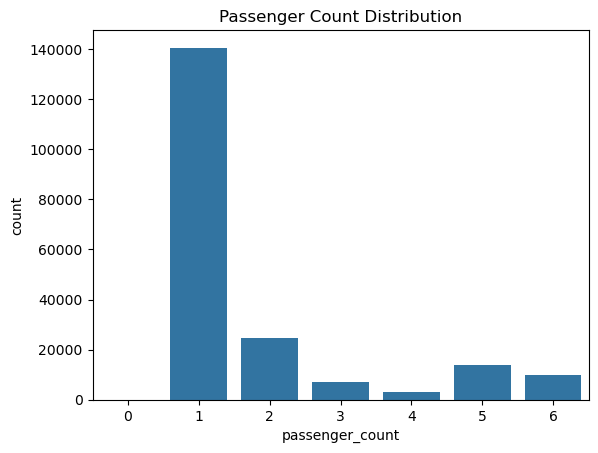

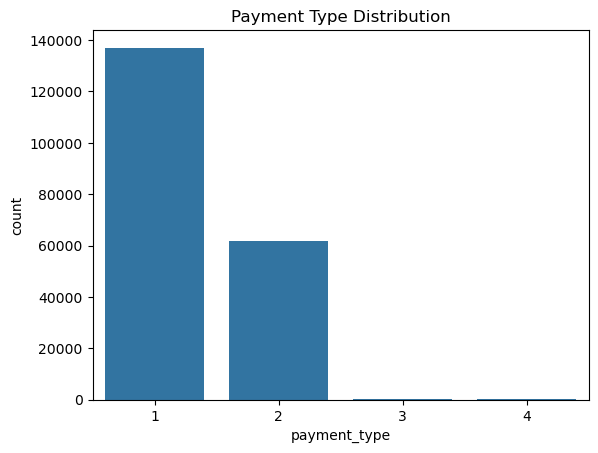

In [ ]:
# Passenger count
sns.countplot(x='passenger_count', data=df)
plt.title("Passenger Count Distribution")
plt.show()

# Payment types
sns.countplot(x='payment_type', data=df)
plt.title("Payment Type Distribution")
plt.show()


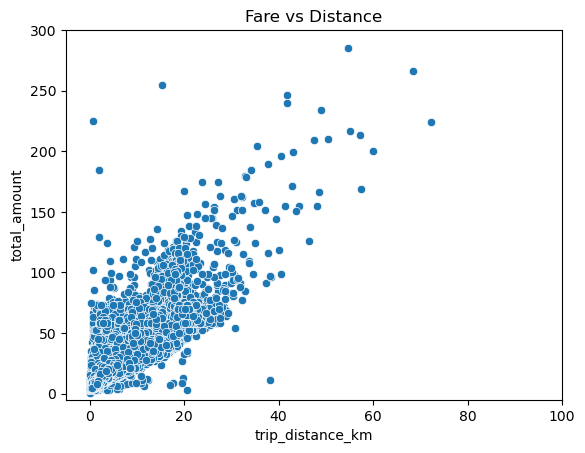

In [ ]:
sns.scatterplot(x='trip_distance_km', y='total_amount', data=df)
plt.title("Fare vs Distance")
plt.xlim(-5, 100)
plt.ylim(-5, 300)
plt.show()


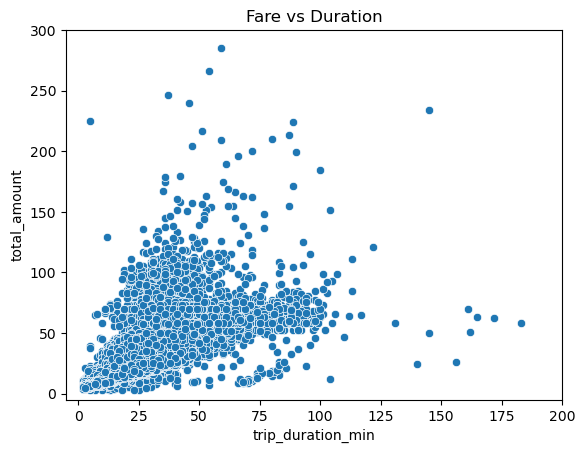

In [ ]:
sns.scatterplot(x='trip_duration_min', y='total_amount', data=df)
plt.title("Fare vs Duration")
plt.xlim(-5, 200)
plt.ylim(-5, 300)
plt.show()


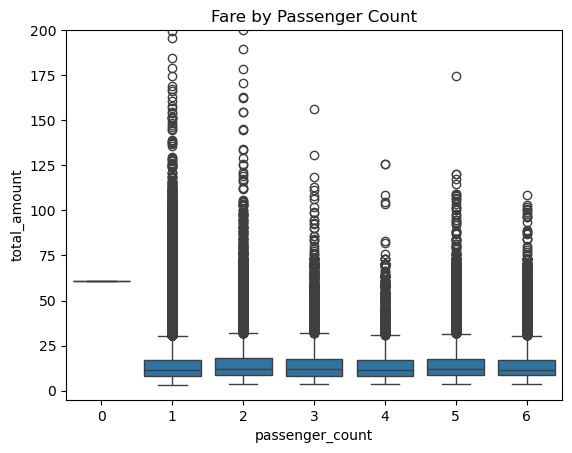

In [ ]:
sns.boxplot(x='passenger_count', y='total_amount', data=df)
plt.title("Fare by Passenger Count")
plt.ylim(-5, 200)
plt.show()


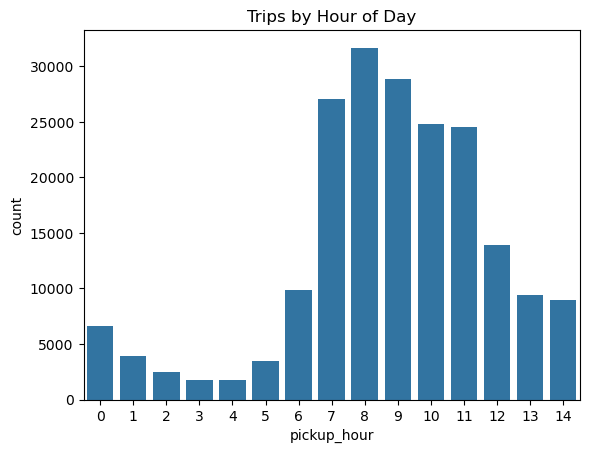

In [ ]:
sns.countplot(x='pickup_hour', data=df)
plt.title("Trips by Hour of Day")
plt.show()

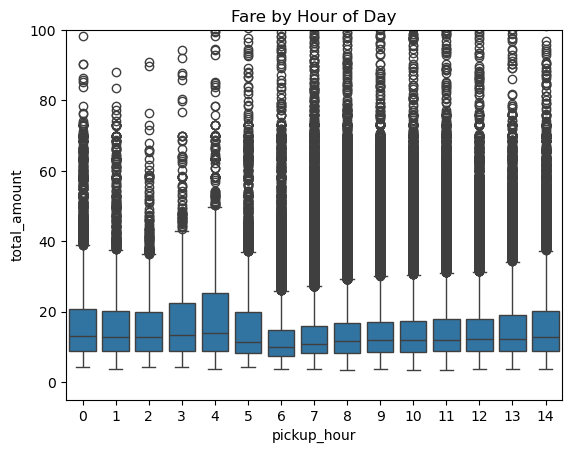

In [ ]:
sns.boxplot(x='pickup_hour', y='total_amount', data=df)
plt.title("Fare by Hour of Day")
plt.ylim(-5, 100)
plt.show()


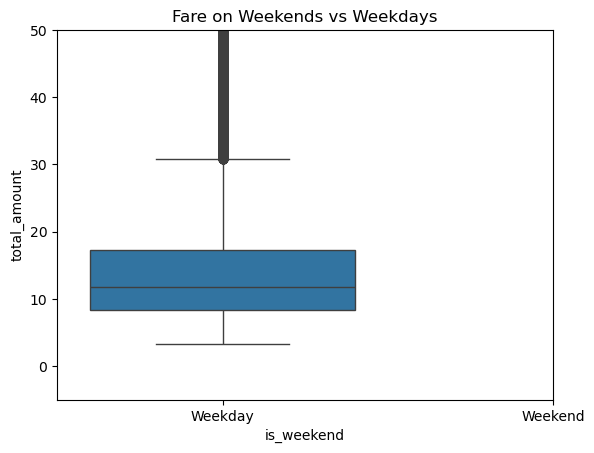

In [ ]:
sns.boxplot(x='is_weekend', y='total_amount', data=df)
plt.title("Fare on Weekends vs Weekdays")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylim(-5,50)
plt.show()


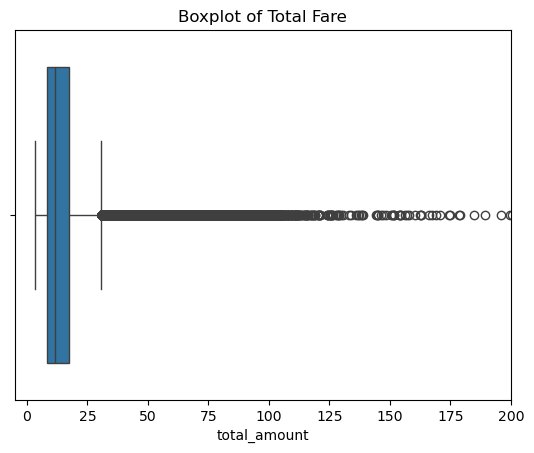

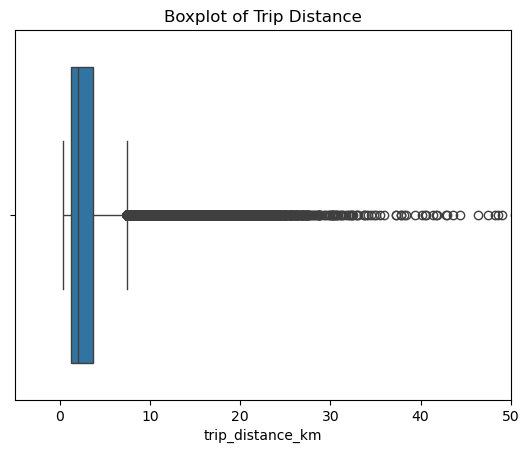

In [ ]:
sns.boxplot(x=df['total_amount'])
plt.title("Boxplot of Total Fare")
plt.xlim(-5,200)
plt.show()

sns.boxplot(x=df['trip_distance_km'])
plt.title("Boxplot of Trip Distance")
plt.xlim(-5,50)
plt.show()


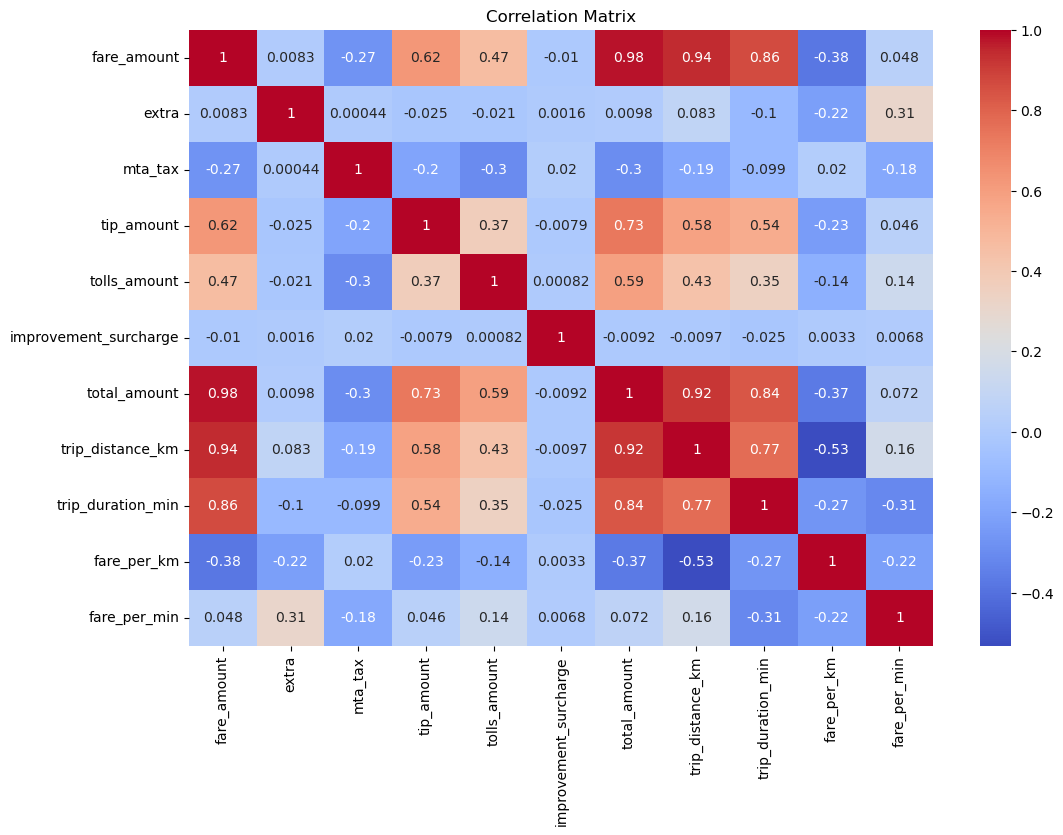

In [ ]:
numeric_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
                'tolls_amount', 'improvement_surcharge', 'total_amount',
                'trip_distance_km', 'trip_duration_min',
                'fare_per_km', 'fare_per_min']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Step 5: Data Transformation

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply to key columns
for col in ['total_amount', 'trip_distance_km', 'trip_duration_min']:
    df = remove_outliers_iqr(df, col)


In [ ]:
df['log_total_amount'] = np.log1p(df['total_amount'])
df['log_distance'] = np.log1p(df['trip_distance_km'])
df['log_duration'] = np.log1p(df['trip_duration_min'])


In [ ]:
# Binary flag encoding
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# One-hot encode rate code & payment type
df = pd.get_dummies(df, columns=['RatecodeID', 'payment_type'], drop_first=True)


In [ ]:
scaler = StandardScaler()
scaled_cols = ['trip_distance_km', 'trip_duration_min', 'fare_amount']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [ ]:
print(df.dtypes)


VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
store_and_fwd_flag                int64
dropoff_longitude               float64
dropoff_latitude                float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
pickup_hour                       int32
pickup_day                        int32
pickup_month                      int32
pickup_year                       int32
is_weekend                        int32
am_or_pm                         object
is_night                          int64
trip_duration_min               float64
trip_distance_km                float64


In [ ]:
df.to_csv('cleaned_taxi_data.csv', index=False)

### Step 6: Feature Selection

In [ ]:
# Target variable
y = df['total_amount']

# Drop target and unnecessary columns from X
X = df.drop(['total_amount', 'fare_amount', 'tip_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()

In [ ]:
target_corr = corr_matrix['total_amount'].drop('total_amount').sort_values(ascending=False)

print("Top correlations with total_amount:")
print(target_corr)


Top correlations with total_amount:
log_total_amount         0.979275
fare_amount              0.967904
trip_duration_min        0.902788
log_duration             0.872020
log_distance             0.823256
trip_distance_km         0.818204
tip_amount               0.621377
tolls_amount             0.092472
VendorID                 0.030930
passenger_count          0.010718
mta_tax                  0.003371
improvement_surcharge    0.001157
store_and_fwd_flag      -0.001493
extra                   -0.013275
is_night                -0.015126
pickup_longitude        -0.023036
dropoff_longitude       -0.033842
pickup_latitude         -0.073274
dropoff_latitude        -0.141334
fare_per_km             -0.257312
fare_per_min            -0.498583
Name: total_amount, dtype: float64


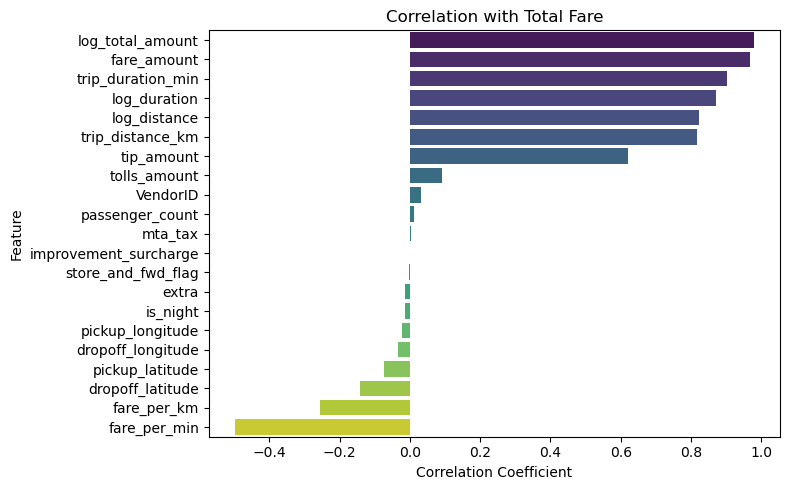

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=target_corr.values, y=target_corr.index, hue=target_corr.index, dodge=False, palette='viridis', legend=False)
plt.title("Correlation with Total Fare")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
non_numeric = X.select_dtypes(include='object')
print(non_numeric.head())

   am_or_pm
0        AM
1        AM
8        AM
10       AM
11       AM


In [ ]:
X['am_or_pm'] = np.where(X['am_or_pm'] == 'AM', 0, 1)

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

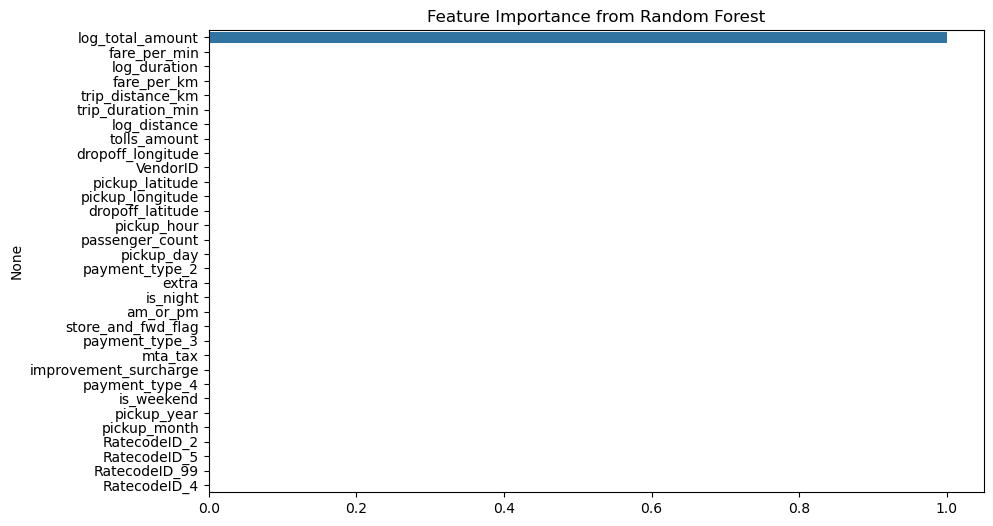

In [ ]:
# Feature Importance Plot
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance from Random Forest")
plt.show()

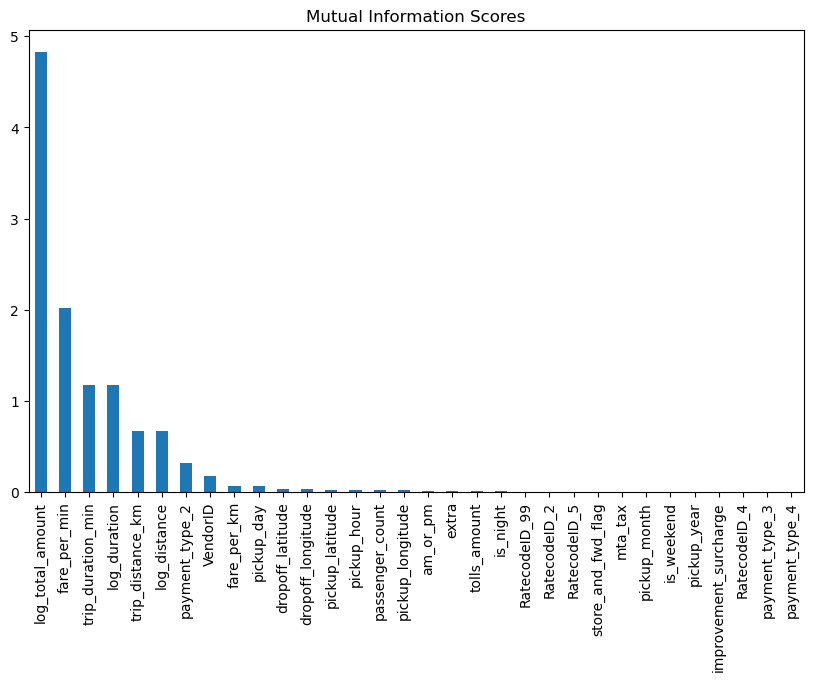

In [ ]:
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()

In [ ]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Top features selected by RFE:\n", selected_features)


Top features selected by RFE:
 Index(['mta_tax', 'improvement_surcharge', 'trip_duration_min',
       'trip_distance_km', 'log_total_amount', 'log_distance', 'log_duration',
       'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99'],
      dtype='object')


In [ ]:
# X is ready for model training
print("Final shape of X:", X.shape)
print("Final features:\n", X.columns.tolist())

Final shape of X: (167032, 32)
Final features:
 ['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_year', 'is_weekend', 'am_or_pm', 'is_night', 'trip_duration_min', 'trip_distance_km', 'fare_per_km', 'fare_per_min', 'log_total_amount', 'log_distance', 'log_duration', 'RatecodeID_2', 'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99', 'payment_type_2', 'payment_type_3', 'payment_type_4']


### Step 7: Model Building – TripFare: Predicting Urban Taxi Fare with Machine Learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))

In [ ]:
evaluate(lr, X_test, y_test)
evaluate(rf, X_test, y_test)
evaluate(xgb, X_test, y_test)

MAE: 0.31178864352016056
RMSE: 0.476389426192288
R²: 0.9887179965208672
MAE: 9.058580547008387e-05
RMSE: 0.0017488679848132764
R²: 0.9999998479536295
MAE: 0.02379786289280285
RMSE: 0.08816828097404672
R²: 0.9996135558394119


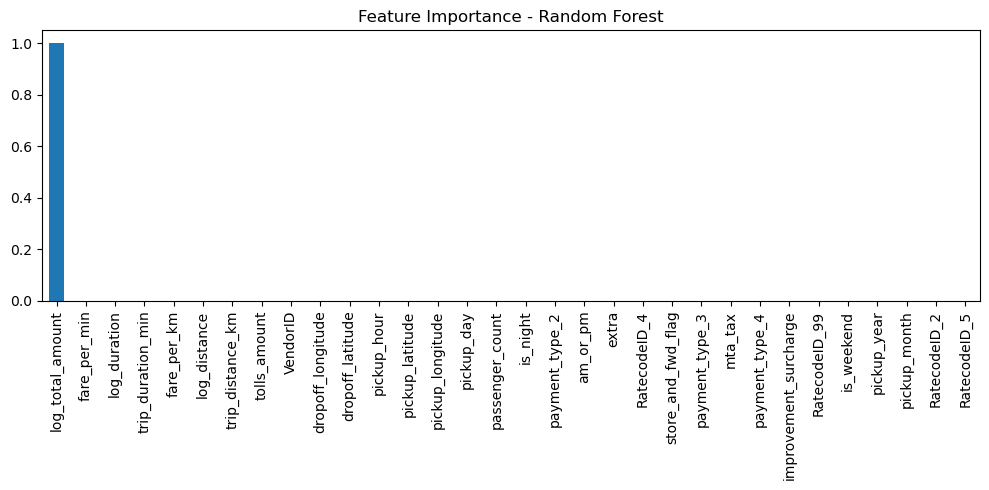

In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"----- {name} -----")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return y_pred

In [ ]:
def plot_residuals(y_test, y_pred, title="Residual Plot"):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(title)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.axvline(0, color='red', linestyle='--')
    plt.show()

In [ ]:
def plot_actual_vs_predicted(y_test, y_pred, title="Actual vs Predicted"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel("Actual Fare")
    plt.ylabel("Predicted Fare")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
def plot_feature_importance(model, feature_names, top_n=10):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

In [ ]:
# Check data types
print(X_train.dtypes)

# Drop non-numeric columns (example)
X_train = X_train.select_dtypes(include=["int64", "float64"])
X_test = X_test.select_dtypes(include=["int64", "float64"])


VendorID                   int64
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
store_and_fwd_flag         int64
dropoff_longitude        float64
dropoff_latitude         float64
extra                    float64
mta_tax                  float64
tolls_amount             float64
improvement_surcharge    float64
pickup_hour                int32
pickup_day                 int32
pickup_month               int32
pickup_year                int32
is_weekend                 int32
am_or_pm                   int32
is_night                   int64
trip_duration_min        float64
trip_distance_km         float64
fare_per_km              float64
fare_per_min             float64
log_total_amount         float64
log_distance             float64
log_duration             float64
RatecodeID_2                bool
RatecodeID_4                bool
RatecodeID_5                bool
RatecodeID_99               bool
payment_type_2              bool
payment_ty

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
feature_cols = ['passenger_count', 'pickup_hour', 'pickup_day', 'trip_distance_km']
X_train = X_train[feature_cols]
X_test = X_test[feature_cols]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


KeyError: "['pickup_hour', 'pickup_day'] not in index"

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("expected_columns.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)